##### Copyright 2020 Google LLC.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

## DigitOnTFFlowers

This colab gives an example of creating a similar dataset to the DigitOnImageNet dataset as shown in Figure 4(b) in ***Intriguing Properties of Contrastive Losses***.

In [20]:
#@title Imports.

import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()

import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [21]:
num_mnist_digits_used = 16  #@param

mnist = tf.keras.datasets.mnist
(mnist_images, mnist_labels), _ = mnist.load_data()
mnist_images = mnist_images[:num_mnist_digits_used]

def map_fn(image, label):
  # Sample one mnist image.
  i = tf.random.uniform([], maxval=num_mnist_digits_used, dtype=tf.int32)
  digit = tf.squeeze(tf.slice(mnist_images, [i, 0, 0], [1, 28, 28]))
  digit_label = tf.squeeze(tf.slice(mnist_labels, [i], [1]))
  digit = tf.image.grayscale_to_rgb(tf.expand_dims(digit, -1))
  digit = tf.image.convert_image_dtype(digit, dtype=tf.float32)
  image = tf.image.resize(image, [224, 224]) / 255.

  size_big, size_small = 224, 28
  images = []
  for x_ratio in [0.15, 0.45, 0.75]:
    for y_ratio in [0.15, 0.45, 0.75]:
      pad_x, pad_y = int(size_big * x_ratio), int(size_big * y_ratio)
      x_max, y_max = size_big - size_small, size_big - size_small
      d = tf.pad(digit,
                 [[pad_x, x_max - pad_x],
                 [pad_y, y_max - pad_y],
                 [0, 0]])
      images.append(d)
  images.append(image)

  image = tf.reduce_max(tf.stack(images, 0), 0)
  return image, label, digit_label

In [22]:
# Use `tf_flowers` in this example instead of `imagenet2012` because the latter 
# needs to be downloaded manually.
# (See https://www.tensorflow.org/datasets/catalog/imagenet2012)

builder = tfds.builder('tf_flowers')
builder.download_and_prepare()

dataset = builder.as_dataset(split='train', as_supervised=True)
dataset = dataset.map(map_fn)
it = iter(dataset)

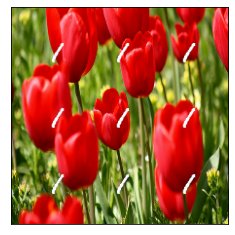

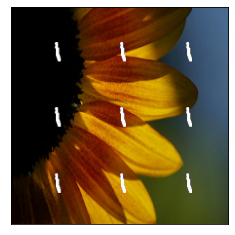

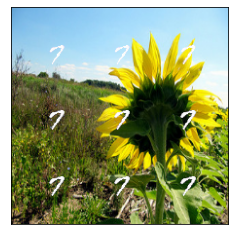

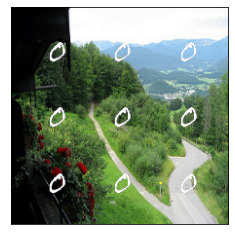

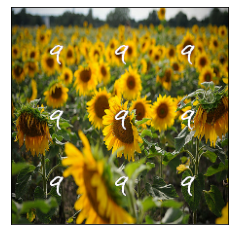

In [23]:
#@title Visualize some images.
for _ in range(5):
  image, label, mnist_label = it.next()
  plt.figure(figsize=(4, 4))
  plt.imshow(image)
  plt.gca().axes.xaxis.set_ticks([])
  plt.gca().axes.yaxis.set_ticks([])